#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
# This function is to plot the confusion matrix.
def plot_confusion_matrix(y, y_predict):
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    cm = confusion_matrix(y, y_predict)
    plt.figure(figsize=(6,5))
    ax = plt.subplot()
    sns.heatmap(cm, annot = True, ax=ax, cmap='Reds', fmt='g')
    
    # Labels for x-axis
    ax.set_xlabel('Predicted Labels')
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()
    
    # Labels for y-axis
    ax.set_ylabel('True Labels')
    ax.yaxis.set_label_position('left')
    ax.yaxis.tick_left()
    
    # Set title
    ax.set_title('Confusion Matrix')
    
    # Set tick labels
    ax.set_xticklabels(['Did Not Land', 'Landed'])
    ax.set_yticklabels(['Did Not Land', 'Landed'], rotation=0)
    
    plt.tight_layout()
    plt.show()

#### Load the dataframe

In [3]:
URL1 = "F:\Dataset_part1\dataset_part_2.csv"
data = pd.read_csv(URL1)
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
URL2 = 'F:\Dataset_Part1\dataset_part_3.csv'
X = pd.read_csv(URL2)
X = X.astype(int)
X.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### TASK 1

##### Create a NumPy array from the column Class in data, by applying the method to_numpy() then assign it to the variable Y,make sure the output is a Pandas series (only one bracket df['name of column']).

In [5]:
Y = pd.Series(data['Class'].to_numpy())
Y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    0
9    0
dtype: int64

#### TASK 2

##### Standardize the data in X then reassign it to the variable X using the transform provided below.

In [6]:
transform = preprocessing.StandardScaler()

In [7]:
X = transform.fit_transform(X)
X

array([[-1.71291154e+00, -1.90400359e-04, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.67441914e+00, -1.19521445e+00, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.63592675e+00, -1.16265599e+00, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       ...,
       [ 1.63592675e+00,  1.99101655e+00,  3.49060516e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [ 1.67441914e+00,  1.99101655e+00,  1.00389436e+00, ...,
        -2.15665546e-01,  5.38516481e+00, -1.05999788e-01],
       [ 1.71291154e+00, -5.19197979e-01, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01,  9.43398113e+00]])

##### Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [9]:
X_test.shape

(18, 80)

In [10]:
Y_test.shape

(18,)

#### TASK 4

##### Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [11]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [12]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv = 10)
logreg_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [13]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8214285714285714


#### TASK 5

##### Calculate the accuracy on the test data using the method score:

In [14]:
logreg_accuracy = logreg_cv.score(X_test, Y_test)
print(f"logreg_accuracy: {logreg_accuracy}")

logreg_accuracy: 0.8333333333333334


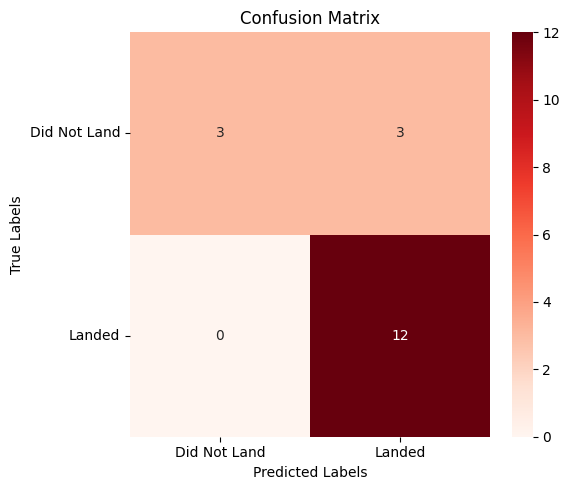

In [15]:
# We can plot the confusion matrix
logreg_yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,logreg_yhat)

#### TASK 6

##### Create a support vector machine object then create a GridSearchCV object svm_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [16]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [17]:
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [18]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142858


#### TASK 7

##### Calculate the accuracy on the test data using the method score:

In [19]:
svm_accuracy = svm_cv.score(X_test, Y_test)
print(f"svm_sccuracy: {svm_accuracy}")

svm_sccuracy: 0.8333333333333334


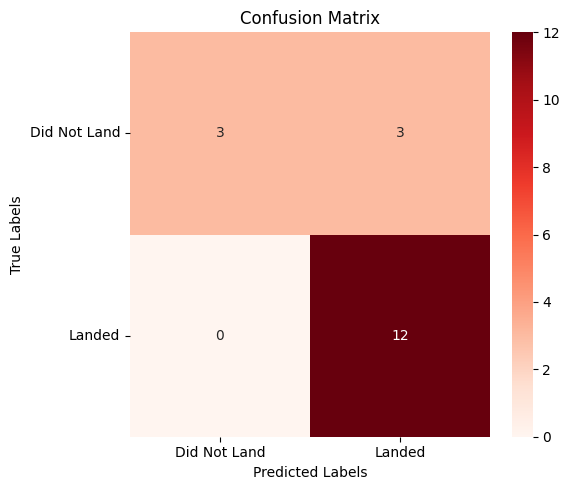

In [20]:
# We can plot the confusion matrix
svm_yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,svm_yhat)

#### TASK 8

##### Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [21]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [22]:
tree_cv = GridSearchCV(tree, parameters, cv = 10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [23]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.875


#### TASK 9

#### Calculate the accuracy of tree_cv on the test data using the method score:

In [24]:
tree_accuracy = tree_cv.score(X_test, Y_test)
print(f"tree_accuracy: {tree_accuracy}")

tree_accuracy: 0.8333333333333334


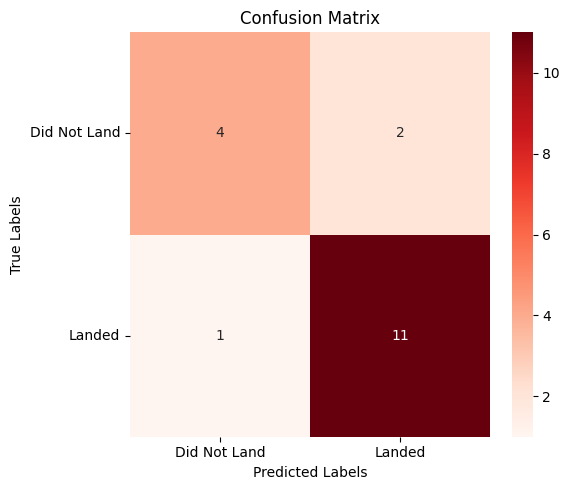

In [25]:
tree_yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,tree_yhat)

#### TASK 10

#### Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [26]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [27]:
knn_cv = GridSearchCV(KNN, parameters, cv = 10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [28]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
accuracy : 0.8339285714285714


#### TASK 11

##### Calculate the accuracy of knn_cv on the test data using the method score:

In [29]:
knn_accuracy = knn_cv.score(X_test, Y_test)
print(f"knn accurac: {knn_accuracy}")

knn accurac: 0.8333333333333334


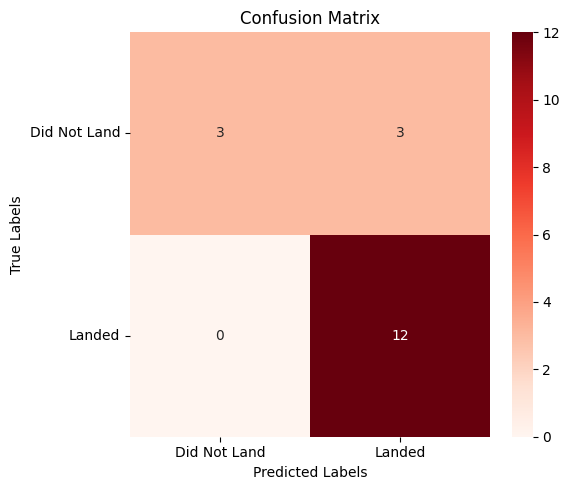

In [30]:
knn_yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, knn_yhat)

#### TASK 12

##### Find the method performs best:

In [31]:
from sklearn.metrics import jaccard_score, f1_score

#Examining the scores from the test sets
jaccard_scores = [
                jaccard_score(Y_test, logreg_yhat, average = 'binary'),
                jaccard_score(Y_test, svm_yhat, average = 'binary'),
                jaccard_score(Y_test, tree_yhat, average = 'binary'),
                jaccard_score(Y_test, knn_yhat, average = 'binary'),
                ]

f1_scores = [
            f1_score(Y_test, logreg_yhat, average = 'binary'),
            f1_score(Y_test, svm_yhat, average = 'binary'),
            f1_score(Y_test, tree_yhat, average = 'binary'),
            f1_score(Y_test, knn_yhat, average = 'binary'),
            ]

accuracy = [logreg_accuracy, svm_accuracy, tree_accuracy, knn_accuracy]
scores = pd.DataFrame(np.array([jaccard_scores, f1_scores, accuracy]), 
                      index = ['Jaccard Score', 'F1 Score', 'Accuracy'], 
                      columns = ['Logreg', 'SVM', 'Tree', 'KNN'])
scores

,Logreg,SVM,Tree,KNN
Jaccard Score,0.800000,0.800000,0.785714,0.800000
F1 Score,0.888889,0.888889,0.880000,0.888889
Accuracy,0.833333,0.833333,0.833333,0.833333


In [32]:
#Examining the scores from the Whole Dataset

jaccard_scores = [
                jaccard_score(Y, logreg_cv.predict(X), average = 'binary'),
                jaccard_score(Y, svm_cv.predict(X), average = 'binary'),
                jaccard_score(Y, tree_cv.predict(X), average = 'binary'),
                jaccard_score(Y, knn_cv.predict(X), average = 'binary'),
                ]

f1_scores = [
            f1_score(Y, logreg_cv.predict(X), average = 'binary'),
            f1_score(Y, svm_cv.predict(X), average = 'binary'),
            f1_score(Y, tree_cv.predict(X), average = 'binary'),
            f1_score(Y, knn_cv.predict(X), average = 'binary'),
            ]

accuracy = [logreg_cv.score(X,Y), svm_cv.score(X,Y), tree_cv.score(X,Y), knn_cv.score(X,Y)]
scores = pd.DataFrame(np.array([jaccard_scores, f1_scores, accuracy]), 
                      index = ['Jaccard Score', 'F1 Score', 'Accuracy'], 
                      columns = ['Logreg', 'SVM', 'Tree', 'KNN'])
scores

,Logreg,SVM,Tree,KNN
Jaccard Score,0.952381,0.869565,0.820896,0.794521
F1 Score,0.975610,0.930233,0.901639,0.885496
Accuracy,0.966667,0.900000,0.866667,0.833333


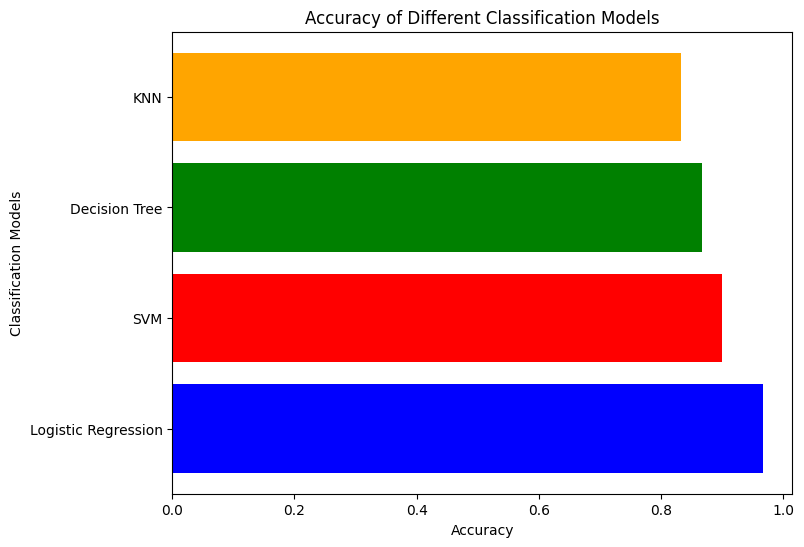

In [38]:
import matplotlib.pyplot as plt
models = ['Logistic Regression','SVM','Decision Tree','KNN']
accuracy = [logreg_cv.score(X,Y), svm_cv.score(X,Y), tree_cv.score(X,Y), knn_cv.score(X,Y)]
plt.figure(figsize=(8,6))
plt.barh(models,accuracy,color=['blue','red','green','orange'])
plt.ylabel('Classification Models')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Classification Models')
plt.show()

#### Conclusion

##### Based on the scores in the methods of Whole Dataset, Logistic Regression is the best model because of its high score and also higher accuracy